In [15]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [23]:
task1=pd.read_csv('Titanic-Dataset.csv')

In [25]:
task1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
task1.shape

(891, 12)

In [27]:
task1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [28]:
task1['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [31]:
task1['Survived'].value_counts().keys()

Int64Index([0, 1], dtype='int64')

In [32]:
task1['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

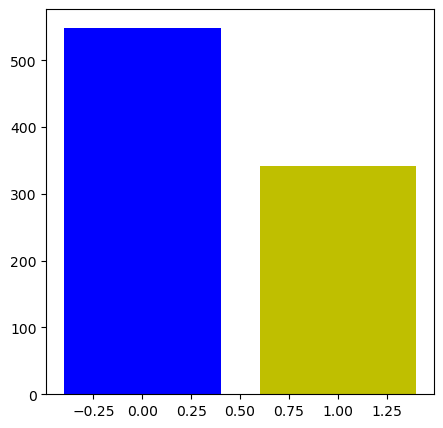

In [30]:
plt.figure(figsize=(5,5))
plt.bar(list(task1['Survived'].value_counts().keys()),list(task1['Survived'].value_counts()),color=["b","y"])
plt.show()

In [33]:
task1['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

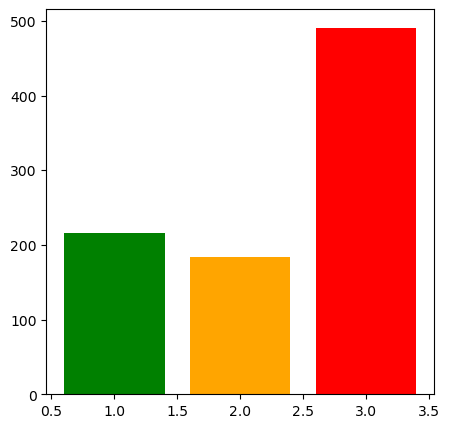

In [34]:
plt.figure(figsize=(5,5))
plt.bar(list(task1['Pclass'].value_counts().keys()),list(task1['Pclass'].value_counts()),color=["red","green","orange"])
plt.show()

In [35]:
task1['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

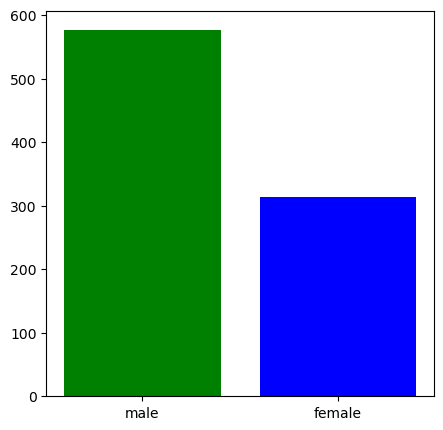

In [36]:
plt.figure(figsize=(5,5))
plt.bar(list(task1['Sex'].value_counts().keys()),list(task1['Sex'].value_counts()),color=["g","b"])
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

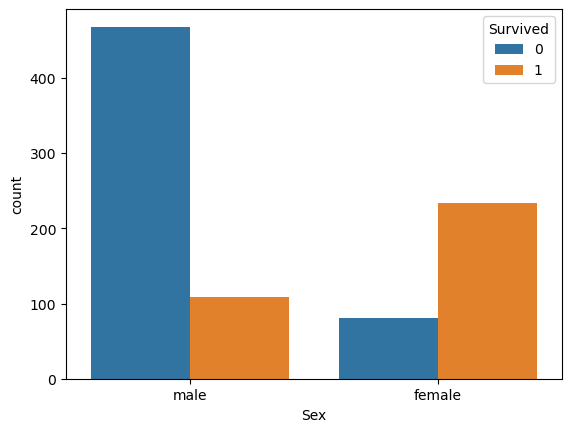

In [37]:
sns.countplot(x=task1['Sex'],hue=task1['Survived'])

<Axes: xlabel='Survived', ylabel='count'>

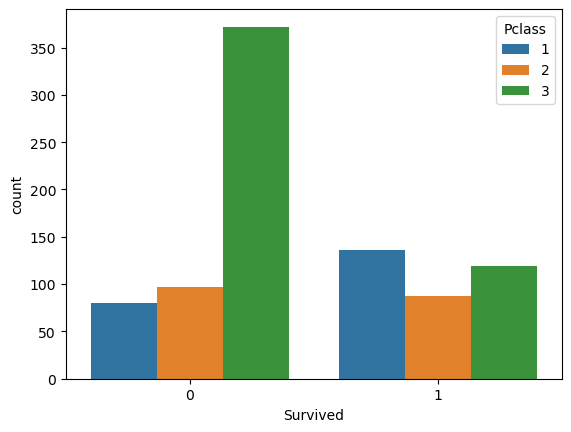

In [38]:
sns.countplot(x=task1['Survived'],hue=task1['Pclass'])

In [39]:
task1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
task1.replace({'Sex':{'male':0,'female':1}},inplace=True)
task1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [41]:
x=task1[['Pclass','Sex']]
y=task1[['Survived']]

In [42]:
x,y

(     Pclass  Sex
 0         3    0
 1         1    1
 2         3    1
 3         1    1
 4         3    0
 ..      ...  ...
 886       2    0
 887       1    1
 888       3    1
 889       1    0
 890       3    0
 
 [891 rows x 2 columns],
      Survived
 0           0
 1           1
 2           1
 3           1
 4           0
 ..        ...
 886         0
 887         1
 888         0
 889         1
 890         0
 
 [891 rows x 1 columns])

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [44]:
print(x.shape,x_train.shape,x_test.shape)

(891, 2) (712, 2) (179, 2)


In [45]:
print(y.shape,y_train.shape,y_test.shape)

(891, 1) (712, 1) (179, 1)


In [49]:
from sklearn.linear_model import LogisticRegression
ML=LogisticRegression()
ML.fit(x_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [50]:
x_test_prediction=ML.predict(x_test)
print(x_test_prediction)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [51]:
print(y_test)

     Survived
495         0
648         0
278         0
31          1
255         1
..        ...
780         1
837         0
215         1
833         0
372         0

[179 rows x 1 columns]


In [52]:
x_train_prediction=ML.predict(x_train)
print(x_train_prediction)

[1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0
 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0
 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0
 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0
 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0
 0 1 0 0 1 0 0 1 1 0 0 0 

In [53]:
print(y_train)

     Survived
140         0
439         0
817         0
378         0
491         0
..        ...
835         1
192         1
629         0
559         1
684         0

[712 rows x 1 columns]


In [56]:
from sklearn.metrics import accuracy_score
train_accuracy=accuracy_score(x_train_prediction,y_train)
test_accuracy=accuracy_score(x_test_prediction,y_test)
print("Accuracy scores of training and test data are",train_accuracy,"and",test_accuracy,"respectively")

Accuracy scores of training and test data are 0.7865168539325843 and 0.7877094972067039 respectively
